In [1]:
from fastai.vision.all import *

In [2]:
%matplotlib inline
%reload_ext autoreload

In [3]:
import torch

if torch.cuda.is_available():
    print(True) 


True


In [ ]:
!nvidia-smi

In [4]:
%cd /home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class_gray

/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class_gray


In [5]:
from pathlib import Path
path = Path('.')

In [6]:
dls = ImageDataLoaders.from_folder(path, train='malformed_potatoes_fourier_3_class_gray', valid_pct= 0.2, item_tfms=Resize(224), shuffle=True, bs=32, seed=42)

In [7]:
dls.valid_ds

(#49) [(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(2)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(2)),(PILImage mode=RGB size=640x640, TensorCategory(2)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0))...]

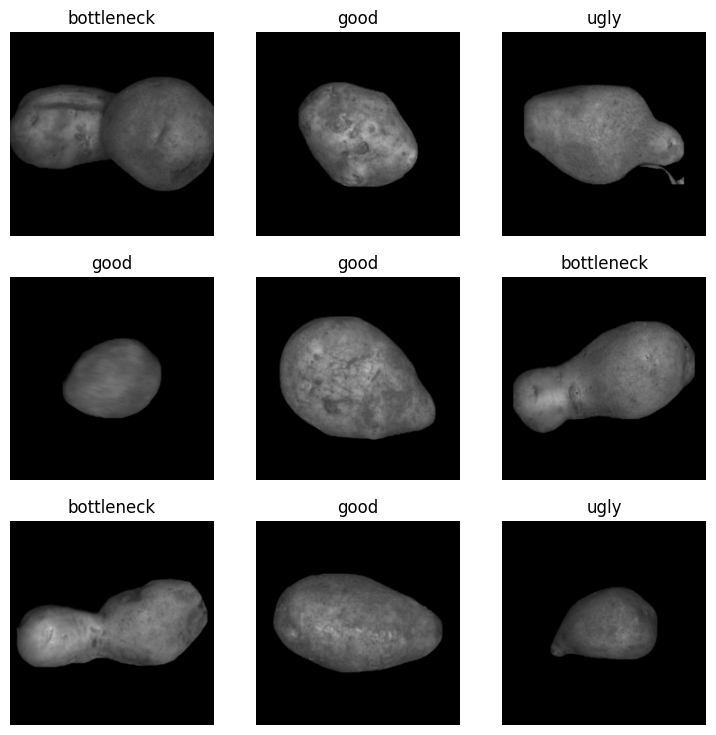

In [8]:
dls.show_batch()

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [10]:
learn.fine_tune(10, base_lr=0.0002)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,1.845872,1.155851,0.510204,00:05
1,1.711987,1.124441,0.469388,00:04
2,1.475790,1.023462,0.428571,00:05
3,1.301279,0.805042,0.408163,00:05
4,1.117524,0.676559,0.326531,00:05
5,0.952038,0.605299,0.265306,00:05
6,0.824885,0.641314,0.346939,00:05
7,0.742156,0.548817,0.224490,00:05
8,0.667509,0.500126,0.183673,00:05
9,0.603090,0.478511,0.163265,00:05


SuggestedLRs(valley=0.0002290867705596611)

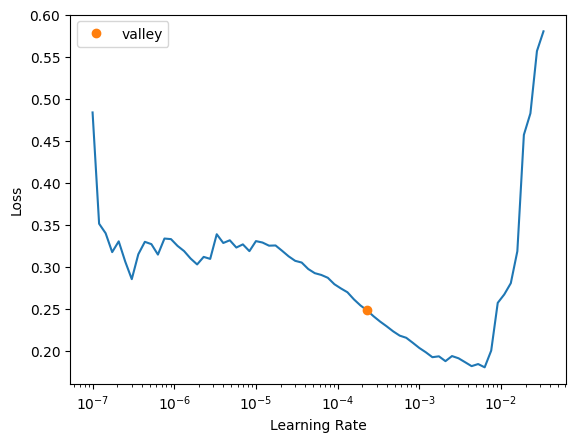

In [11]:
learn.lr_find()

In [12]:
learn.fine_tune(8, base_lr=0.0002290867705596611)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.267286,0.299855,0.081633,00:05
1,0.256016,0.219664,0.061224,00:05
2,0.226227,0.173990,0.040816,00:05
3,0.199590,0.148838,0.040816,00:05
4,0.171774,0.131393,0.040816,00:05
5,0.158166,0.121404,0.040816,00:04
6,0.140779,0.118227,0.040816,00:06
7,0.141816,0.113619,0.040816,00:06


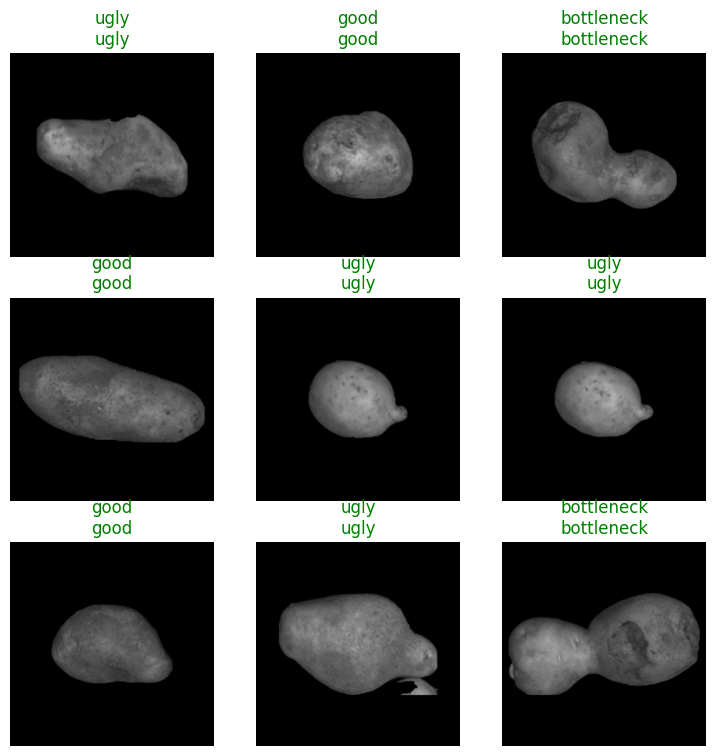

In [13]:
learn.show_results()

In [14]:
learn_accuracy = vision_learner(dls, resnet18, metrics=accuracy)

In [15]:
learn_accuracy.fine_tune(10, base_lr=0.0001)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,1.653242,1.594296,0.285714,00:05
1,1.650134,1.582245,0.244898,00:05
2,1.496367,1.366608,0.387755,00:05
3,1.359437,1.113054,0.469388,00:05
4,1.249967,0.878936,0.693878,00:06
5,1.180299,0.743407,0.755102,00:05
6,1.076089,0.704991,0.734694,00:05
7,0.985356,0.655589,0.795918,00:05
8,0.919657,0.619375,0.795918,00:05
9,0.869431,0.538105,0.795918,00:05


SuggestedLRs(valley=0.00015848931798245758)

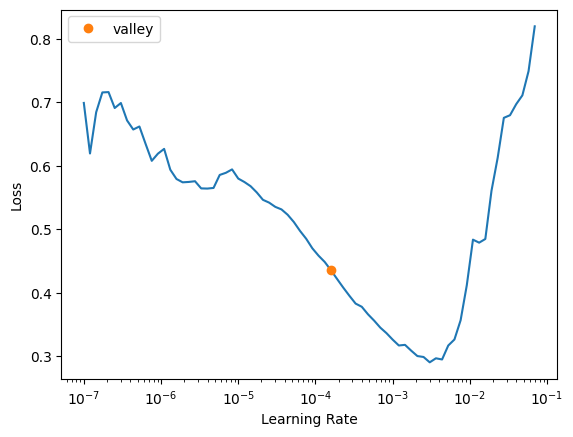

In [16]:
learn_accuracy.lr_find()

In [17]:
learn_accuracy.fine_tune(10, base_lr=0.00015848931798245758)

epoch,train_loss,valid_loss,accuracy,time
0,0.526762,0.458604,0.795918,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.592075,0.376049,0.959184,00:05
1,0.532557,0.290598,0.979592,00:06
2,0.487233,0.192355,0.979592,00:06
3,0.437753,0.139857,0.979592,00:05
4,0.379214,0.111730,0.979592,00:05
5,0.338869,0.099395,0.979592,00:06
6,0.306984,0.094558,0.959184,00:05
7,0.284865,0.089328,0.959184,00:05
8,0.268326,0.088823,0.959184,00:06
9,0.254747,0.091564,0.959184,00:05


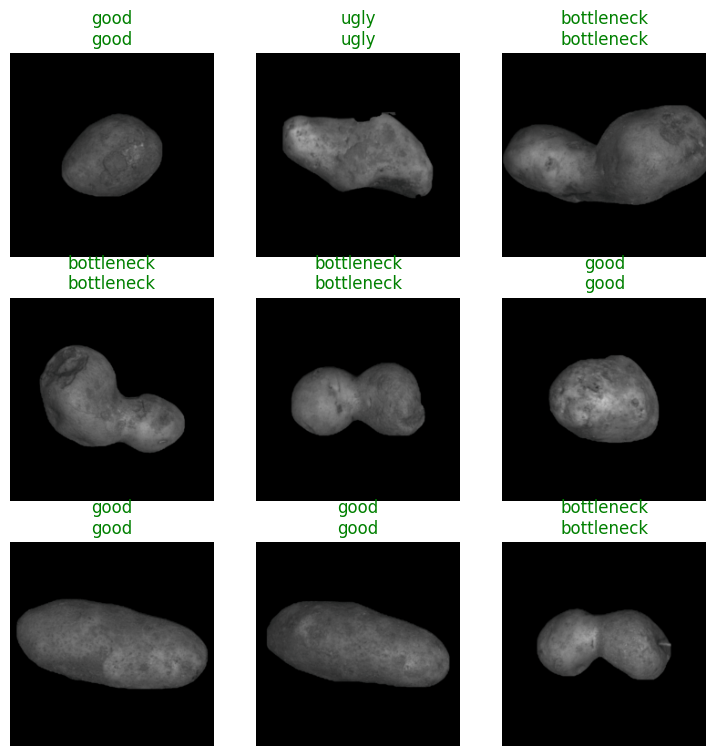

In [18]:
learn_accuracy.show_results()

In [22]:
from PIL import Image

In [31]:
# learn.predict('/home/mishkat/Downloads/potato_good_malformed/girl.png')
test_img_path = "/home/mishkat/Downloads/malformed_potato/potato_good_malformed/int_potato.jpg"
convert_gray = Image.open(test_img_path)
convert_gray = convert_gray.convert('L')

# learn.predict(convert_gray)
learn.predict(test_img_path)

('malformed', tensor(1), tensor([0.3234, 0.6766]))

<Axes: >

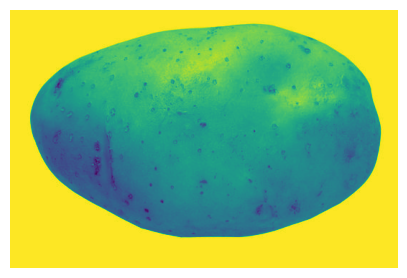

In [32]:
convert_gray.show()

In [19]:
learn.export("/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_3_class_gray/models/export_3_class_80_20_gray.pkl")

In [ ]:
# To load the model and run prediction
load_saved_model = load_learner("/home/mishkat/Downloads/potato_good_malformed/malformed_potatoes_fourier_2_class/models/export_2_class_80_20.pkl")

In [ ]:
load_saved_model.predict()